# Multidimensional scaling of E-MAP data
 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# read in r dataframe
# data = pd.read_csv("/Users/annie/emap/20180109/final.csv")
data = pd.read_csv("/Users/annie/emap/20180109/sep.csv")

Look at the dataframe we've read in.

In [3]:
data.head()

,method,value,mutant,partner,protein,ORF,cluster_number,cluster
0,corr_of_corr_no_na_no_mut,-0.441411,K129F,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
1,corr_of_corr_no_na_no_mut,-0.246723,K129I,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
2,corr_of_corr_no_na_no_mut,-0.374419,K129T,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
3,corr_of_corr_no_na_no_mut,-0.449169,K132H,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
4,corr_of_corr_no_na_no_mut,0.375386,K143H,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2


In [4]:
#data = data[data['cluster'] == 'Golgi and ER_GO_2']
data = data[data['cluster'] == 'cell cycle_GO_2']

In [5]:
data.shape

(32509, 8)

In [6]:
data['mut_cluster'] = data.mutant + "-" + data.cluster

In [7]:
data.columns

Index(['method', 'value', 'mutant', 'partner', 'protein', 'ORF',
       'cluster_number', 'cluster', 'mut_cluster'],
      dtype='object')

Now create correlation of correlations matrix for entire set of proteins. In matrix, the index denotes the correlation of correlation for a given mutant-cluster and the column labels denote the protein. 

In [8]:
# create dictionary with list of mut_cluster for each protein
proteins = pd.unique(data.protein).tolist()
i = 0
f = [None] * len(proteins)
for protein in proteins:
    data_protein = data[data.protein == protein]
    f[i] = data_protein.mut_cluster
    i = i+1
d = dict(zip(proteins, f))

In [9]:
# mut_cluster is a list of all mut_cluster
mut_cluster = pd.unique(data.mut_cluster).tolist()

# initialize empty dataframe with rownames as the unique mut_cluster
cmat = pd.DataFrame([], index = mut_cluster)

# need a counter for column names
i = 0

# loop through the proteins
for protein, c in d.items():
    df_protein = data[data.protein == protein]
    #create column of data frame
    column = []
    for mc in mut_cluster:
        v = df_protein[df_protein.mut_cluster == mc].value
        #if v.empty:
            #column.append(0)
        #else:
        column.append(v.values[0])
    #create index name
    index = str(i)
    #add column
    cmat[index] = column
    #update index
    i = i + 1

cmat[10:20]

,0,1,2,3,4,5,6,7,8,9,...,518,519,520,521,522,523,524,525,526,527
N102K-cell cycle_GO_2,-0.412013,0.319505,0.434527,-0.097416,0.056928,-0.170052,-0.005061,-0.262051,0.010346,0.025317,...,-0.118194,-0.071617,-0.261162,0.303758,-0.516570,-0.154306,-0.151312,-0.201059,0.084790,0.148522
N102M-cell cycle_GO_2,0.145610,0.408155,0.275341,0.124432,0.019522,0.037423,-0.299685,-0.397067,-0.105657,0.070533,...,-0.267365,-0.112724,0.097783,0.463471,-0.022210,-0.133993,-0.041008,-0.161379,-0.374047,0.083421
N105L-cell cycle_GO_2,0.095234,0.002791,0.137782,0.045992,0.188410,-0.264532,-0.104162,-0.158293,-0.036798,0.086278,...,-0.133661,-0.080090,-0.076192,0.033018,-0.111074,0.031910,0.056932,0.143104,-0.033357,0.291648
N105V-cell cycle_GO_2,-0.163432,0.246694,0.302772,-0.212824,0.127975,-0.054193,-0.216368,-0.112464,0.180098,0.002993,...,-0.239662,-0.036287,0.055008,0.234584,-0.101958,-0.264284,-0.303719,-0.249408,-0.426383,-0.118268
N84Y-cell cycle_GO_2,0.151926,0.241375,0.049139,0.096692,-0.024162,-0.218792,-0.124512,-0.219559,0.106627,0.117946,...,0.104763,-0.130979,-0.109022,0.308627,0.457311,0.002091,-0.002333,0.078790,-0.181924,0.021823
NTER3XFLAG WT-cell cycle_GO_2,0.074104,-0.382899,-0.489913,0.044190,-0.353900,0.042361,0.298385,0.403003,-0.037100,-0.225019,...,0.315722,0.018709,-0.110912,-0.603604,0.123377,0.331250,0.336763,0.001153,0.632409,0.060680
Q147E-cell cycle_GO_2,-0.462558,0.178507,0.512105,-0.132106,0.418124,-0.419227,0.247642,-0.135178,0.249690,0.207152,...,-0.258125,0.259738,-0.096866,0.366328,-0.550131,-0.238123,-0.526495,0.039523,-0.150801,0.313554
Q147L-cell cycle_GO_2,0.405697,0.140576,0.108699,0.033698,-0.006416,0.353308,-0.130537,-0.306103,-0.205927,0.240166,...,-0.261990,-0.146488,0.128896,0.263308,0.227320,-0.219294,-0.052576,0.052688,-0.301563,-0.059795
R108A-cell cycle_GO_2,-0.109186,-0.348401,-0.411504,-0.181863,0.133092,-0.193666,0.128085,0.300550,0.089177,-0.358163,...,0.002906,0.118732,0.099124,-0.351852,0.204968,-0.028735,-0.221738,0.075797,-0.117153,0.089065
R108D-cell cycle_GO_2,0.417221,-0.069631,0.010278,-0.100294,-0.096089,0.279458,-0.181480,0.061319,-0.158643,0.090007,...,-0.353503,-0.097919,0.281704,0.087010,0.172171,0.085229,0.003429,-0.069563,-0.312841,-0.029509


In [10]:
len(proteins)

528

In [11]:
cmat.shape

(59, 528)

### Distance between protein interaction profiles

In [12]:
from sklearn.manifold import MDS
from scipy.spatial import distance

Plotting infrastructure setup

In [13]:
def simple_scatterplot(x,y,title,labels,savepath):
    # Scatterplot with a title and labels
    fig, ax = plt.subplots(figsize=(16,14))
    ax.scatter(x, y, marker='o')
    plt.title(title, fontsize=14)
    for i, label in enumerate(labels):
        ax.annotate(label, (x[i],y[i]))
    #save file
    if (savepath != None):
        plt.savefig(savepath)
    return ax

In [14]:
def fit_MDS_2D(distances):
    # A simple MDS embedding plot:
    mds = MDS(n_components=2, dissimilarity='precomputed',random_state=123)
    #fit based on computed Euclidean distances
    mds_fit = mds.fit(distances)
    #get 2D Euclidean points of presidents
    points = mds_fit.embedding_
    return points

In [15]:
norm=cmat.fillna(0)

Make a numpy array version of the dataframe to use with Scikit-Learn:

In [16]:
norm = np.array(norm)
norm.shape

(59, 528)

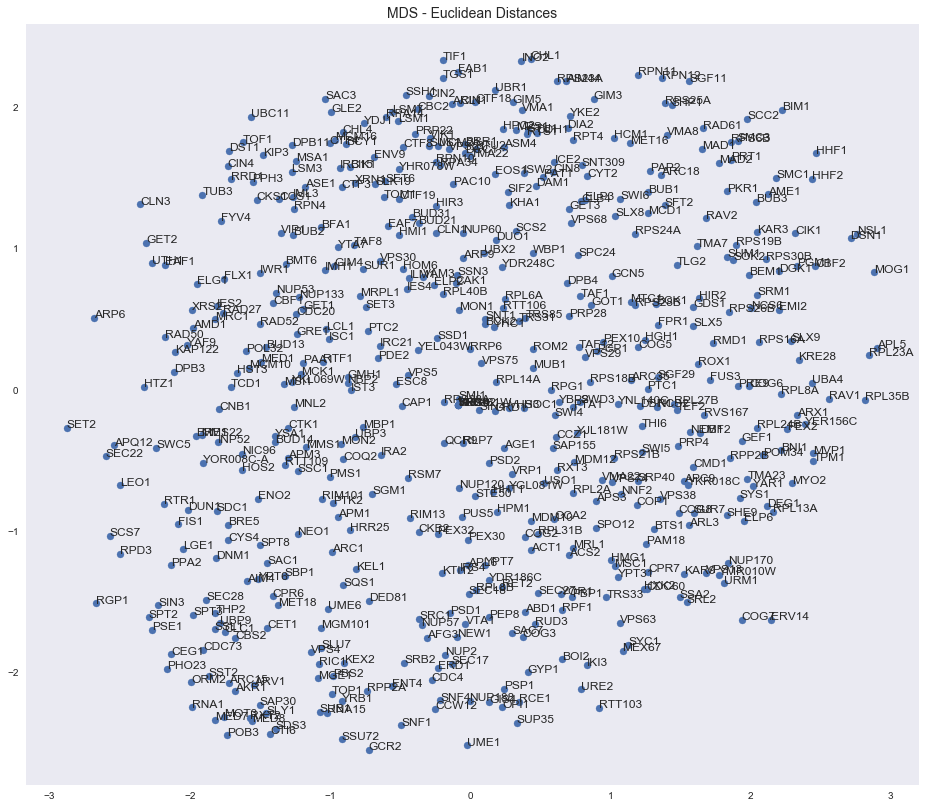

In [17]:
#Intialize empty matrix of Euclidean distances
euc_dists = np.zeros(shape = (norm.shape[1], norm.shape[1]))
#loop through columns
for i in range(norm.shape[1]):
    #catch first column to compare
    cur_col = norm[:, i]
    #loop through remaining columns
    for j in range(i, norm.shape[1], 1):
        #catch second column to compare
        comp_col = norm[:, j]
        
        #compute Euclidean Distance
        euc_dist = distance.euclidean(cur_col, comp_col)
        euc_dists[i, j] = euc_dist
        
        #the matrices are symmetric, saves runntime to do this
        if (i != j):
            euc_dists[j, i] = euc_dist

# Fit with MDS
points_euclidean = fit_MDS_2D(euc_dists)

# Create scatter plot of projected points based on Euclidean Distances
simple_scatterplot(points_euclidean[:,0],points_euclidean[:,1],
                   "MDS - Euclidean Distances",
                   proteins,
                   'results/mds_1.png'
                  );

In [18]:
def plot_embedding(data, title='MDS Embedding', savepath=None, palette='viridis', 
                   size=7):
    """Plot an MDS embedding dataframe for all presidents.
    
    Uses Seaborn's `lmplot` to create an x-y scatterplot of the data, encoding the 
    value of the investor field into the hue (which can be mapped to any desired
    color palette).
    
    Parameters
    ----------
    data : DataFrame
        A DataFrame that must contain 3 columns labeled 'x', 'y' and 'investor'.
        
    title : optional, string
        Title for the plot
        
    savepath : optional, string
        If given, a path to save the figure into using matplotlib's `savefig`.
        
    palette : optional, string
        The name of a valid Seaborn palette for coloring the points.
    
    size : optional, float
        Size of the plot in inches (single number, square plot)
        
    Returns
    -------
    FacetGrid
        The Seaborn FacetGrid object used to create the plot.
    """
    #process data
    x = data['x']
    y = data['y']
    protein = data['protein']
    
    #set boolean for using or not using annotation
    do_annotate = False
    
    #create scatterplot using linear model without a regression fit
    p = sns.lmplot(x = "x", y = "y", data = data, hue = "protein", palette = palette, size = size, fit_reg= False, legend=False)
    p.ax.legend(bbox_to_anchor=(1.01, 0.85),ncol=2)
    
    #this is used in order to annotate
    ax = plt.gca()
    
    #make grid and set title
    plt.grid()
    plt.title(title,fontsize=16)
    
    #adjust border for file saving so not cut-off
    plt.tight_layout()
    
    #save file
    if (savepath != None):
        plt.savefig(savepath)

In [19]:
#create embed_peu data frame
embed_peu = pd.DataFrame([])
embed_peu['x'] = points_euclidean[:, 0]
embed_peu['y'] = points_euclidean[:, 1]
embed_peu['protein'] = proteins

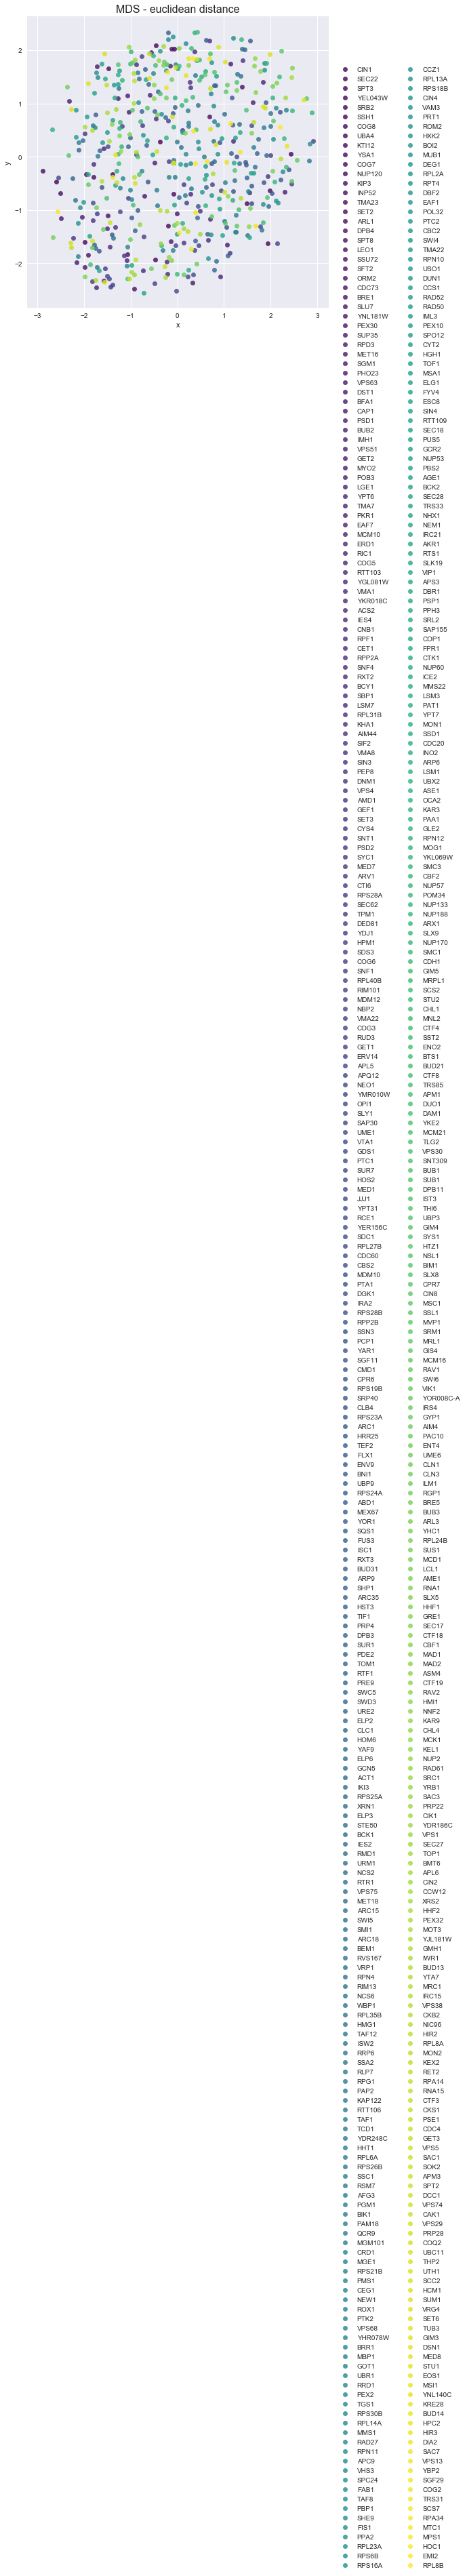

In [20]:
plot_embedding(embed_peu, 'MDS - euclidean distance', 'results/mds.png');